In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import ipywidgets as widgets
from IPython.display import display
import joblib 

# File path and chunk size
file_path = '/tmp/icpy/Hist_all_10y.csv'
chunk_size = 1 * 10**5  # Adjust based on available memory

# Number of bins for the 2D histogram
bins = 100

# Initialize empty arrays for accumulating histogram results
hist2d_total = np.zeros((bins, bins))
xedges, yedges = None, None

In [34]:
# Function to compute 2D histogram from a DataFrame chunk
def compute_2d_histogram(df, bins):
    # Compute the 2D histogram for the chunk
    hist2d, xedges, yedges = np.histogram2d(df['hat_ts'], df['dec'], bins=bins)
    return hist2d, xedges, yedges

In [35]:
# Read and process the CSV file in chunks
for chunk in pd.read_csv(file_path, chunksize=chunk_size):
    hist2d_chunk, xedges, yedges = compute_2d_histogram(chunk, bins)
    hist2d_total += hist2d_chunk

# Save the histogram data and edges to files
joblib.dump((hist2d_total, xedges, yedges), '/tmp/icpy/hist2d_total.pkl')

['/tmp/icpy/hist2d_total.pkl']

In [3]:
# Ensure the data loaded correctly

# Load the histogram data and edges from files
data = joblib.load('/tmp/icpy/hist2d_total.pkl')
if len(data) == 3:
    hist2d_total, xedges, yedges = data
else:
    raise ValueError("Loaded data does not contain the expected number of elements.")

# Define a function to plot with different parameters
def plot_histogram(cmap='viridis', log_scale=True):
    norm = LogNorm(vmin=1e-1) if log_scale else None
    plt.figure(figsize=(10, 6))
    plt.imshow(hist2d_total, origin='lower', cmap=cmap, aspect='auto', norm=norm,
               extent=[yedges[0], yedges[-1], xedges[0], xedges[-1]])
    plt.colorbar(label='Counts (log scale)' if log_scale else 'Counts')
    plt.xlabel('dec')
    plt.ylabel('hat_ts')
    plt.title('2D Histogram of hat_ts vs. dec (Log Scale)' if log_scale else '2D Histogram of hat_ts vs. dec')
    plt.show()

# Create interactive widgets
interactive_plot = widgets.interactive(plot_histogram,
    cmap=widgets.Dropdown(options=['viridis', 'plasma', 'inferno', 'magma'], value='viridis'),
    log_scale=widgets.Checkbox(value=True)
)

# Display the interactive plot
display(interactive_plot)

interactive(children=(Dropdown(description='cmap', options=('viridis', 'plasma', 'inferno', 'magma'), value='v…

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# File path
file_path = '/tmp/icpy/Hist_all_10y.csv'

# Fraction of data to sample
sample_fraction = 0.0001  # 0.1% of the data

# Read a random sample of the CSV file
df_sample = pd.read_csv(file_path, skiprows=lambda x: x > 0 and np.random.rand() > sample_fraction)

# Check the number of rows sampled
print(f"Number of rows sampled: {len(df_sample)}")

Number of rows sampled: 23251


In [38]:
# Number of bins for the 2D histogram
bins = 100

# Compute the 2D histogram for the sampled data
hist2d, xedges, yedges = np.histogram2d(df_sample['hat_ts'], df_sample['dec'], bins=bins)

# Apply logarithmic scaling to the histogram
hist2d_log = np.log10(hist2d + 1)  # Add 1 to avoid log(0)

# Plot the 2D histogram with logarithmic scale
plt.figure(figsize=(10, 6))
plt.imshow(hist2d_log.T, origin='lower', cmap='viridis', aspect='auto')
plt.colorbar(label='Log10(Counts)')
plt.xlabel('hat_ts')
plt.ylabel('dec')
plt.title('2D Histogram of dec vs. hat_ts (Log Scale) - Sampled Data')
plt.show()

NameError: name 'df_sample' is not defined

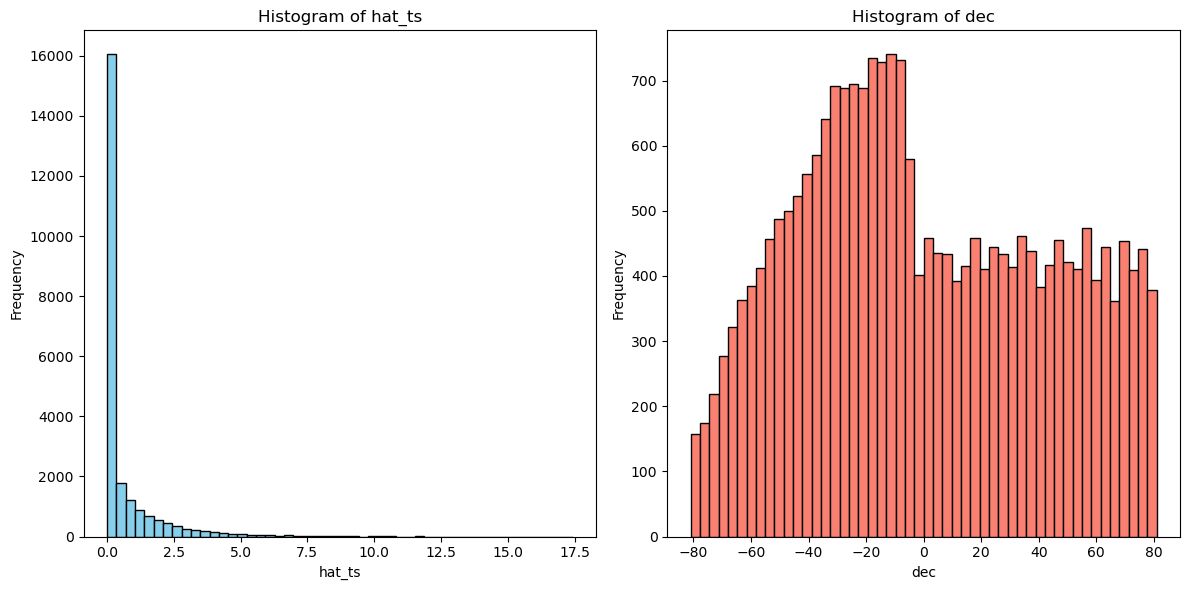

In [9]:
# Plotting the 1D histogram for 'hat_ts'
plt.figure(figsize=(12, 6))

# Histogram for 'hat_ts'
plt.subplot(1, 2, 1)
plt.hist(df_sample['hat_ts'], bins=50, color='skyblue', edgecolor='black')
plt.xlabel('hat_ts')
plt.ylabel('Frequency')
plt.title('Histogram of hat_ts')

# Histogram for 'dec'
plt.subplot(1, 2, 2)
plt.hist(df_sample['dec'], bins=50, color='salmon', edgecolor='black')
plt.xlabel('dec')
plt.ylabel('Frequency')
plt.title('Histogram of dec')

# Adjust layout
plt.tight_layout()
plt.show()

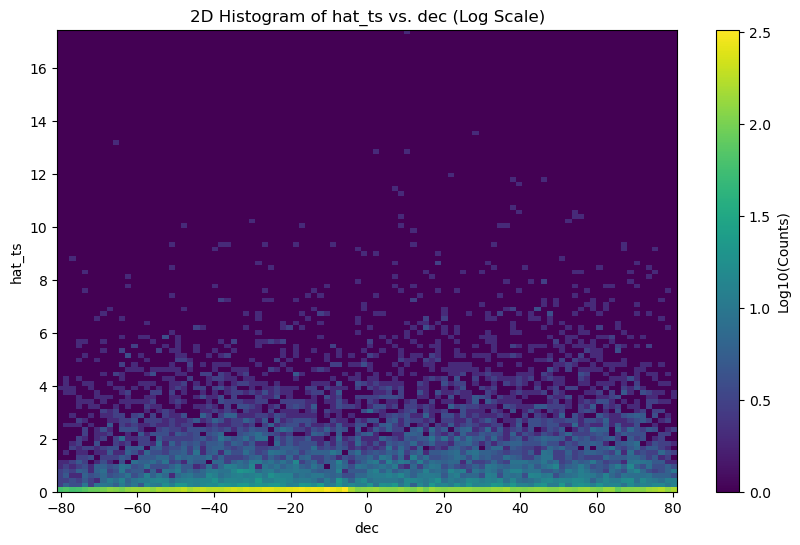

In [13]:
# Number of bins for the 2D histogram
bins = 100

# Compute the 2D histogram for 'dec' vs. 'hat_ts'
hist2d, xedges, yedges = np.histogram2d(df_sample['dec'], df_sample['hat_ts'], bins=bins)

# Apply logarithmic scaling to the histogram to improve visibility
hist2d_log = np.log10(hist2d + 1)  # Add 1 to avoid log(0)

# Plot the 2D histogram with logarithmic scale
plt.figure(figsize=(10, 6))
plt.imshow(hist2d_log.T, origin='lower', cmap='viridis', aspect='auto', extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]])
plt.colorbar(label='Log10(Counts)')
plt.xlabel('dec')
plt.ylabel('hat_ts')
plt.title('2D Histogram of hat_ts vs. dec (Log Scale)')
plt.show()
